<a href="https://colab.research.google.com/github/sairamadithya/cifar-10/blob/main/cifar_10_customcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEPS FOLLOWED IN THIS NOTEBOOK
1. IMPORTING ESSENTIAL LIBRARIES

2. DATA SPLITTING AND TRANSFORMING

3. MODEL CREATION

4. MODEL COMPILATION

5. MODEL TRAINING

6. MODEL EVALUATION

7. MODEL PREDICTION

# IMPORTING ESSENTIAL LIBRARIES

i am using the tensorflow keras library to build,train and test the model. 
also the cifar-10 dataset is present in the keras library

CIFAR-10
cifar-10 as the name suggests consists of images of 10 classes which are arranged alphabetically. they are 

aeroplane

automobile

bird

cat

deer

dog

frog

horse

ship

truck

this dataset contains about 6000 images of the size 32*32 and is a very good dataset for starters


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from keras.layers import *
from keras.preprocessing import image
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# DATA SPILTTING AND TRANSFORMING

since there are 60000 images as a whole we have to split them into training and testing. 

x- images y-classes (labels)

all colours in the universe have values in the range of (0,255) where white is 0 and black is 255.

we apply a trnsformaton to the training and testing images x so as to convert the range of (0,255) to (0,1)

since the y contains labels it cannot be used by the model.so it is essential to convert them into vectors by using the to_categorical

In [ ]:
(xtrain,ytrain),(xtest,ytest)= cifar10.load_data()
x_train = xtrain / 255.0
y_train = to_categorical(ytrain, 10)

x_test = xtest / 255.0
y_test = to_categorical(ytest, 10)

170508288/170498071 [==============================] - 4s 0us/step


now there are 50000 training images and 10000 testing images.

the (32,32,3) refers to the 32 height 32 width and 3 colour channels (r,g,b)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

#MODEL CREATION

the sequential of the keras is used to create a blank/empty model upon which the layers are stacked upon

the convolutional neural network consists of the three layers namely the convolution, pooling and dense

convolution= they scan the image in which the filters slide onto the input image and perform mathematical operations. they extract features from the image

pooling= these layers are used to perform some mathematial computations and also reduce the parameters

dense- these layers do the classification process. these layers are similar to those in the ANN (artificial neural network)

the dropout layer is used to reduce overfitting (the deviation of testing curves from the training). this cuts off some of the connections in between layers. this is one of the stratergies adopted to prevent overfitting

the gaussian noise is also used to prevent overfitting. adding noises to the input is an efficient technique to prevent overfitting

In [ ]:
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3),padding='same'))
model.add(Conv2D(32,kernel_size=(5,5),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))
model.add(Conv2D(128,kernel_size=(1,1),activation='relu',padding='same'))
model.add(Conv2D(128,kernel_size=(1,1),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))
model.add(GaussianNoise(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 64)         

# MODEL COMPILATION

the loss or error is defined as the difference between the actual and predicted outputs. an ideal model is the one which has zero loss. the function of the optimiser is to find the optimum values of parameters so that the loss is minimum. it does it by finding the gradient of the parameter with the output and updating the values based on the gradient. the metrics parameter can be used to track the efficieny of the model

the optimiser used here is adam and the loss function is crossentropy. the metrics used is accuracy

In [ ]:

model.compile( optimizer='adam',
               loss= 'categorical_crossentropy',
               metrics=['accuracy'])


# MODEL TRAINING

here i have used two callbacks namely the modelcheckpoint and the earlystopping

the modelcheckpoint is used to save the model with the best weights so that we need not train the model but we can load the model

the earlystopping is used to halt the training process so as to find the ideal number of epochs. this is one of the stratergies to prevent overfitting

the formula to be followed while training a model:-

(steps_per_epoch)*(batch size)= number of training images

there are 50000 training images, so a batch size of 16 requires 3125 steps_per_epoch

In [ ]:
mp= tf.keras.callbacks.ModelCheckpoint('mymodel.hdf5',save_best_only=True)
es= tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=6)
callback=[mp,es]
history= model.fit(
         x_train,
         y_train,
         steps_per_epoch= 3125,
         epochs= 50,
         batch_size=16,
         callbacks=callback,
         validation_data= (x_test,y_test))

Epoch 1/50
3125/3125 [==============================] - 40s 5ms/step - loss: 1.9110 - accuracy: 0.2881 - val_loss: 1.3548 - val_accuracy: 0.5112
Epoch 2/50
3125/3125 [==============================] - 17s 5ms/step - loss: 1.2869 - accuracy: 0.5360 - val_loss: 1.0644 - val_accuracy: 0.6216
Epoch 3/50
3125/3125 [==============================] - 16s 5ms/step - loss: 1.0983 - accuracy: 0.6068 - val_loss: 1.0275 - val_accuracy: 0.6355
Epoch 4/50
3125/3125 [==============================] - 15s 5ms/step - loss: 0.9895 - accuracy: 0.6484 - val_loss: 0.9247 - val_accuracy: 0.6735
Epoch 5/50
3125/3125 [==============================] - 16s 5ms/step - loss: 0.9131 - accuracy: 0.6755 - val_loss: 0.9303 - val_accuracy: 0.6687
Epoch 6/50
3125/3125 [==============================] - 16s 5ms/step - loss: 0.8614 - accuracy: 0.6947 - val_loss: 0.8628 - val_accuracy: 0.6960
Epoch 7/50
3125/3125 [==============================] - 16s 5ms/step - loss: 0.8084 - accuracy: 0.7146 - val_loss: 0.8533 - val_ac

#MODEL EVALUATION

In [ ]:
model.evaluate(x_train,y_train)

1563/1563 [==============================] - 7s 4ms/step - loss: 0.4056 - accuracy: 0.8595


[0.4055658280849457, 0.8594599962234497]

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7166 - accuracy: 0.7664


[0.7165708541870117, 0.7663999795913696]

THE MODEL HAS PRODUCED THE FOLLOWING


TRAINING LOSS- 0.405

TRAINING ACCURACY- 85.9%

VALIDATION LOSS- 0.716

VALIDATION ACCURACY- 76.6%

#LOSS AND ACCURACY PLOTS OF THE MODEL

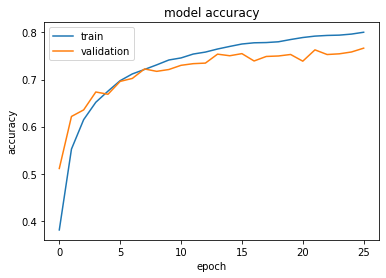

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

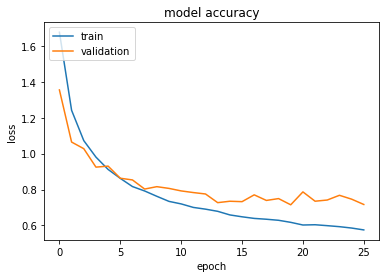

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

the curves have just started to deviate. hence we have prevented overfitting by adopting some of the stratergies

#MODEL PREDICTION

PROJECT TESTING
use the following link to download the pictures
search for the following:- aeroplane automobile bird cat deer dog frog horse ship truck
https://www.pexels.com/
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
The uploaded image is classified as:Frog
THANK YOU FOR USING THIS PROJECT. HOPE THIS HELPS!!!!


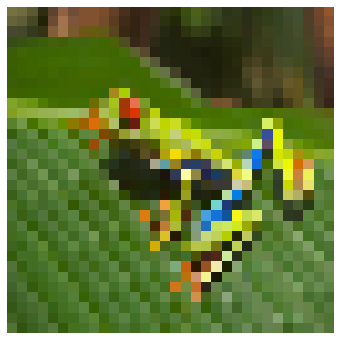

In [ ]:
print('PROJECT TESTING')
print('use the following link to download the pictures')
print('search for the following:- aeroplane automobile bird cat deer dog frog horse ship truck')
print('https://www.pexels.com/')
from keras.preprocessing import image
img = image.load_img('frog.jpeg',target_size=(32,32))
imag = image.img_to_array(img)
image = np.expand_dims(img,axis=0)   ### flattening
ypred = model.predict(image)
print(ypred)
if ypred[0][0]==1: 
    y='Aeroplane' 
elif ypred[0][1]==1: 
    y='Automobile'
elif ypred[0][2]==1: 
    y='Bird' 
elif ypred[0][3]==1: 
    y='Cat' 
elif ypred[0][4]==1: 
    y='Deer' 
elif ypred[0][5]==1: 
    y='Dog' 
elif ypred[0][6]==1: 
    y='Frog' 
elif ypred[0][7]==1: 
    y='Horse' 
elif ypred[0][8]==1: 
    y='Ship' 
elif ypred[0][9]==1: 
    y='Truck'
def plot_img(img):
  plt.figure(figsize=(6,6))
  plt.imshow(img)  
  plt.title('')
  plt.axis('off')
plot_img(img)
print('The uploaded image is classified as:'+str(y))
print('THANK YOU FOR USING THIS PROJECT. HOPE THIS HELPS!!!!')